In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
data=pd.read_csv("/content/car data.csv")

In [4]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
185,Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual,0
123,Royal Enfield Classic 350,2013,1.00,1.47,46500,Petrol,Individual,Manual,0
272,city,2015,7.50,10.00,27600,Petrol,Dealer,Manual,0


In [5]:
data.shape


(301, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#No_Of_Brands=data['Make'].unique()
#print("Total no companies",len(No_Of_Brands))

In [10]:
#cars_by_fueltype=data["Fuel Type"].value_counts()
#print(cars_by_fueltype)

In [11]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [12]:
data.replace({ 'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [18]:
data.replace({ 'Manual':0,'Automatic':1},inplace=True)
data.replace({ 'Dealer':0,'Individual':1},inplace=True)


In [19]:
data.sample(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
154,Yamaha Fazer,2014,0.50,0.88,8000,0,1,0,0
285,jazz,2016,7.40,8.50,15059,0,0,1,0
101,UM Renegade Mojave,2017,1.70,1.82,1400,0,1,0,0
44,omni,2012,1.25,2.69,50000,0,0,0,0
73,etios liva,2011,2.65,5.71,43000,0,0,0,0


In [25]:
X=data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [28]:
print(X.sample(3))

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
104  2017           1.47        4100          0            1             0   
217  2016           4.43       15000          0            0             0   
125  2009           1.75       40000          0            1             0   

     Owner  
104      0  
217      0  
125      0  


In [29]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
X_train.shape

(240, 7)

In [32]:
X_test.shape

(61, 7)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
lr.coef_

array([ 4.09597024e-01,  4.35931782e-01, -5.69425095e-06,  1.85611195e+00,
       -1.06096098e+00,  1.51673015e+00, -8.63072493e-01])

In [37]:
lr.intercept_

-823.3838608384503

In [38]:
train_pred=lr.predict(X_train)

In [42]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [43]:
error=metrics.r2_score(Y_train,train_pred)

In [45]:
error*100


88.38169193709795

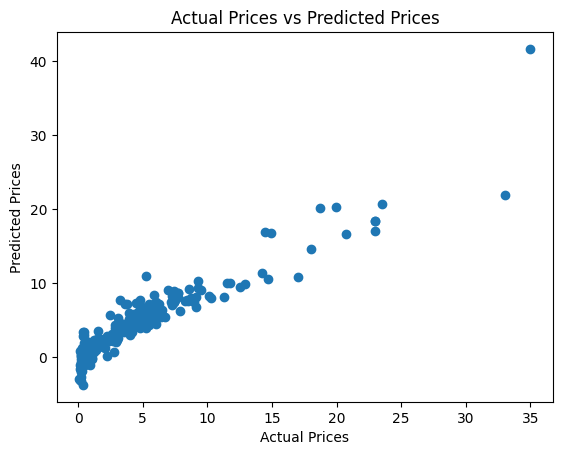

In [46]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()